In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import optuna
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import pickle

In [54]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00


In [7]:
df = pd.read_csv('/content/drive/MyDrive/ML Ops/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [8]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PT', 'B', 'LSTAT', 'MV'],
      dtype='object')

In [9]:
df.dtypes

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,int64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,int64
TAX,int64


### Question 1: Find Discrete and Continuous variables
Answer:


*   Discrete Variables:
    - CHAS
    - RAD
    - TAX

*   Random Variables:
    - CRIM
    - ZN
    - INDUS
    - NOX
    - RM
    - AGE
    - DIS
    - PT
    - B
    - LSTAT
    - MV





### Question 2: Find descriptive analytics of all the variables

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


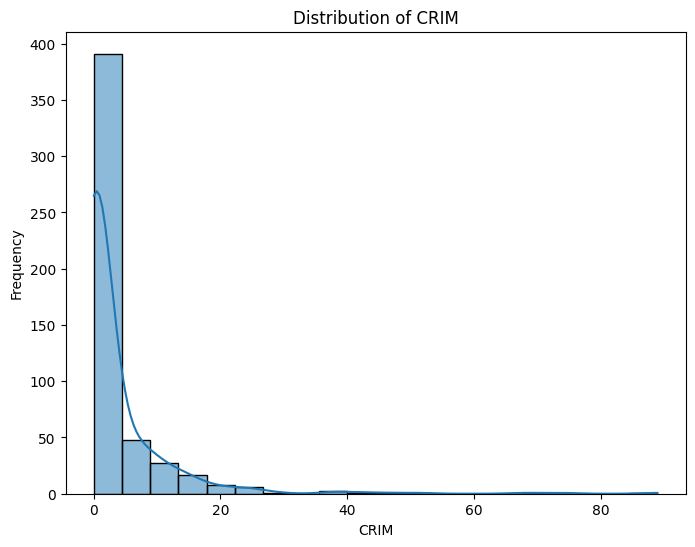

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CRIM'], bins=20, kde=True)
plt.title('Distribution of CRIM')
plt.xlabel('CRIM')
plt.ylabel('Frequency')
plt.show()

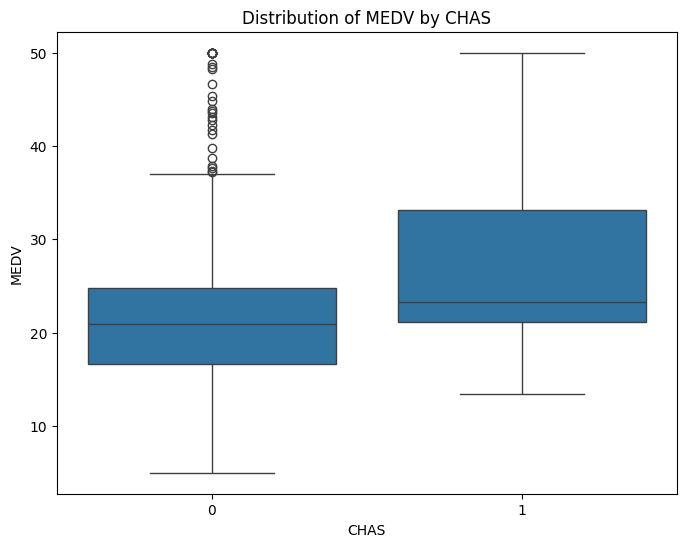

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CHAS', y='MV', data=df)
plt.title('Distribution of MEDV by CHAS')
plt.xlabel('CHAS')
plt.ylabel('MEDV')
plt.show()

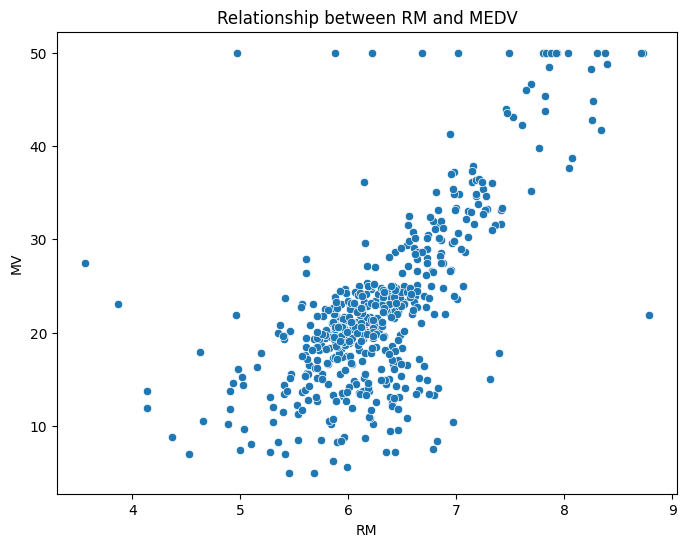

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RM', y='MV', data=df)
plt.title('Relationship between RM and MEDV')
plt.xlabel('RM')
plt.ylabel('MV')
plt.show()

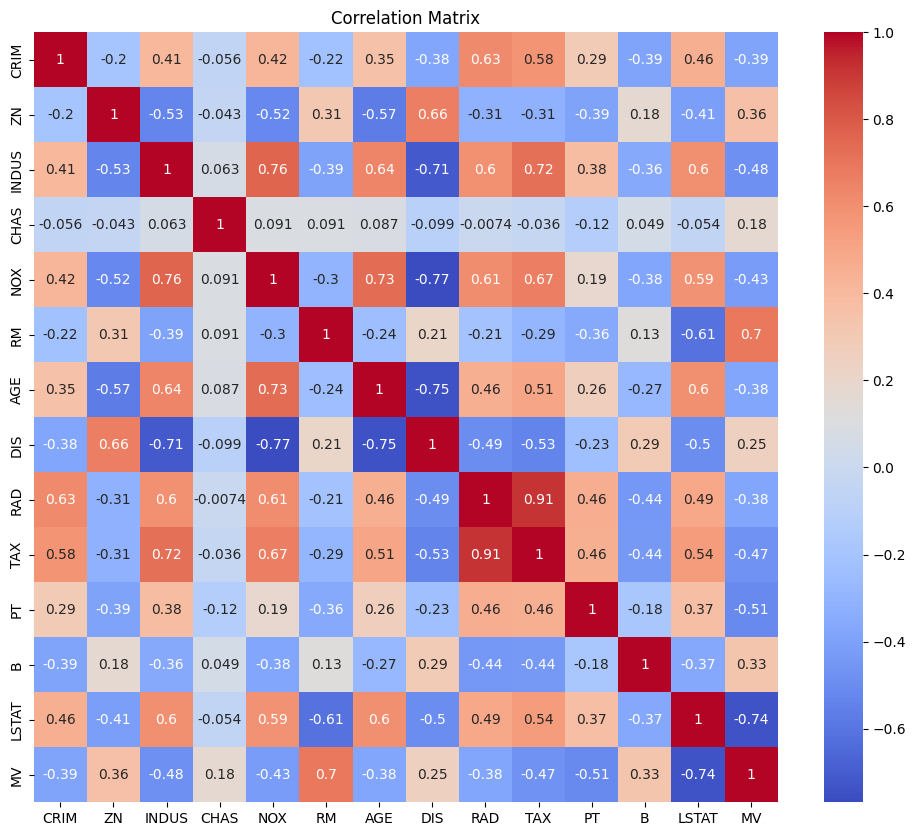

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Questions 3: Generate a linear regression program for the dataset (MV is the output value)

In [15]:
# 1. Prepare the data
X = df.drop('MV', axis=1)
y = df['MV']

In [16]:
# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# 3. Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# 4. Make predictions on the test set
y_pred = model.predict(X_test)

In [19]:
# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 24.291117338821863
R-squared: 0.6687595287571355


### Questiong 4: Normalize the input fields and generate a SGD regressor for the same and find R – Square

In [21]:
# 3. Normalize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# 4. Create and train the SGDRegressor model
model = SGDRegressor(random_state=42)
model.fit(X_train, y_train)

SGDRegressor(random_state=42)

In [23]:
# 5. Make predictions on the test set
y_pred = model.predict(X_test)

In [24]:
# 6. Calculate R-squared
r2 = r2_score(y_test, y_pred)

In [25]:
print(f"R-squared: {r2}")

R-squared: 0.6607964519505976


### Question 5: Do feature selection by dropping pairwise high correlation fields and run the linear regression and SGD regression after removing irrelevant fields and dropping high corelated fields

In [26]:
correlation_threshold = 0.90

In [27]:
# Calculate correlation matrix
corr_matrix = df.corr().abs()

In [28]:
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
CRIM,1.000000,0.200469,0.406583,0.055892,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
ZN,0.200469,1.000000,0.533828,0.042697,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995,0.360445
INDUS,0.406583,0.533828,1.000000,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800,0.483725
CHAS,0.055892,0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929,0.175260
NOX,0.420972,0.516604,0.763651,0.091203,1.000000,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
RM,0.219247,0.311991,0.391676,0.091251,0.302188,1.000000,0.240265,0.205246,0.209847,0.292048,0.355502,0.128069,0.613808,0.695360
AGE,0.352734,0.569537,0.644779,0.086518,0.731470,0.240265,1.000000,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339,0.376955
DIS,0.379670,0.664408,0.708027,0.099176,0.769230,0.205246,0.747881,1.000000,0.494588,0.534432,0.232471,0.291512,0.496996,0.249929
RAD,0.625505,0.311948,0.595129,0.007368,0.611441,0.209847,0.456022,0.494588,1.000000,0.910228,0.464741,0.444413,0.488676,0.381626
TAX,0.582764,0.314563,0.720760,0.035587,0.668023,0.292048,0.506456,0.534432,0.910228,1.000000,0.460853,0.441808,0.543993,0.468536


In [29]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [30]:
upper

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
CRIM,NaN,0.200469,0.406583,0.055892,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
ZN,NaN,NaN,0.533828,0.042697,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995,0.360445
INDUS,NaN,NaN,NaN,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800,0.483725
CHAS,NaN,NaN,NaN,NaN,0.091203,0.091251,0.086518,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929,0.175260
NOX,NaN,NaN,NaN,NaN,NaN,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
RM,NaN,NaN,NaN,NaN,NaN,NaN,0.240265,0.205246,0.209847,0.292048,0.355502,0.128069,0.613808,0.695360
AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339,0.376955
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.494588,0.534432,0.232471,0.291512,0.496996,0.249929
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910228,0.464741,0.444413,0.488676,0.381626
TAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460853,0.441808,0.543993,0.468536


In [31]:
to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]


In [32]:
# Drop the selected features
df_selected = df.drop(columns=to_drop)

In [33]:
X = df_selected.drop('MV', axis=1)
y = df_selected['MV']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression R-squared: {r2_linear}")

Linear Regression R-squared: 0.6536261585718008


In [37]:
sgd_model = SGDRegressor(random_state=42)
sgd_model.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_model.predict(X_test_scaled)
r2_sgd = r2_score(y_test, y_pred_sgd)
print(f"SGD Regression R-squared: {r2_sgd}")

SGD Regression R-squared: 0.6503636239276201


### Question 6: Run PCA on the inputs above and perform both SGD and Linear Regression with varying different no of components

In [38]:
n_components_list = [2, 3, 4, 5]

In [39]:
for n_components in n_components_list:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Linear Regression with PCA
    linear_model = LinearRegression()
    linear_model.fit(X_train_pca, y_train)
    y_pred_linear = linear_model.predict(X_test_pca)
    r2_linear = r2_score(y_test, y_pred_linear)
    print(f"Linear Regression with {n_components} components: R-squared = {r2_linear}")

    # SGD Regression with PCA
    sgd_model = SGDRegressor(random_state=42)
    sgd_model.fit(X_train_pca, y_train)
    y_pred_sgd = sgd_model.predict(X_test_pca)
    r2_sgd = r2_score(y_test, y_pred_sgd)
    print(f"SGD Regression with {n_components} components: R-squared = {r2_sgd}")

Linear Regression with 2 components: R-squared = 0.4977679709178653
SGD Regression with 2 components: R-squared = 0.49435138105134413
Linear Regression with 3 components: R-squared = 0.6012415337465771
SGD Regression with 3 components: R-squared = 0.6019983848893253
Linear Regression with 4 components: R-squared = 0.5831049665145536
SGD Regression with 4 components: R-squared = 0.5836108841251908
Linear Regression with 5 components: R-squared = 0.5842024498494336
SGD Regression with 5 components: R-squared = 0.5830447735584687


### Question 7: Perform one hot encoding of discrete variables and perform linear regression

In [40]:
discrete_vars = ['CHAS', 'RAD', 'TAX']

In [41]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [42]:
encoded_data = encoder.fit_transform(df[discrete_vars])

In [43]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(discrete_vars))


In [44]:
# 5. Concatenate encoded data with original dataframe
df_encoded = pd.concat([df.drop(discrete_vars, axis=1), encoded_df], axis=1)

In [45]:
X = df_encoded.drop('MV', axis=1)
y = df_encoded['MV']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression R-squared (with one-hot encoding): {r2}")

Linear Regression R-squared (with one-hot encoding): 0.7244192954206434


### Question 8: Do a optuna based hyperparameter search for KNN regression, Random Forest Regression and Ridge regression for the same data and check the best hyperaparameter values

In [49]:
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 2, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

In [50]:
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

In [51]:
def objective_ridge(trial):
    alpha = trial.suggest_float('alpha', 0.1, 10.0)
    model = Ridge(alpha=alpha, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

In [56]:
study_knn = optuna.create_study(direction='minimize')
study_knn.optimize(objective_knn, n_trials=100)

[I 2024-12-08 12:51:06,109] A new study created in memory with name: no-name-b5ced74f-7752-4acb-82c3-a8274a7a6a4e
[I 2024-12-08 12:51:06,275] Trial 0 finished with value: 33.19615547411967 and parameters: {'n_neighbors': 12, 'weights': 'uniform'}. Best is trial 0 with value: 33.19615547411967.
[I 2024-12-08 12:51:06,291] Trial 1 finished with value: 25.144538198595576 and parameters: {'n_neighbors': 5, 'weights': 'uniform'}. Best is trial 1 with value: 25.144538198595576.
[I 2024-12-08 12:51:06,306] Trial 2 finished with value: 31.07679153040691 and parameters: {'n_neighbors': 12, 'weights': 'distance'}. Best is trial 1 with value: 25.144538198595576.
[I 2024-12-08 12:51:06,341] Trial 3 finished with value: 27.833442864039135 and parameters: {'n_neighbors': 3, 'weights': 'uniform'}. Best is trial 1 with value: 25.144538198595576.
[I 2024-12-08 12:51:06,364] Trial 4 finished with value: 32.591685620669345 and parameters: {'n_neighbors': 18, 'weights': 'distance'}. Best is trial 1 with v

In [57]:
study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(objective_rf, n_trials=100)

[I 2024-12-08 12:51:36,306] A new study created in memory with name: no-name-68b125fb-46cc-4da5-99d0-3a9ebedd2f77
[I 2024-12-08 12:51:37,999] Trial 0 finished with value: 8.576014387193037 and parameters: {'n_estimators': 157, 'max_depth': 16}. Best is trial 0 with value: 8.576014387193037.
[I 2024-12-08 12:51:39,976] Trial 1 finished with value: 8.596091155377636 and parameters: {'n_estimators': 187, 'max_depth': 19}. Best is trial 0 with value: 8.576014387193037.
[I 2024-12-08 12:51:42,238] Trial 2 finished with value: 8.113378076078758 and parameters: {'n_estimators': 115, 'max_depth': 15}. Best is trial 2 with value: 8.113378076078758.
[I 2024-12-08 12:51:45,118] Trial 3 finished with value: 8.620133214929893 and parameters: {'n_estimators': 172, 'max_depth': 16}. Best is trial 2 with value: 8.113378076078758.
[I 2024-12-08 12:51:45,723] Trial 4 finished with value: 9.324870420948692 and parameters: {'n_estimators': 166, 'max_depth': 5}. Best is trial 2 with value: 8.11337807607875

In [58]:
study_ridge = optuna.create_study(direction='minimize')
study_ridge.optimize(objective_ridge, n_trials=100)

[I 2024-12-08 12:52:32,596] A new study created in memory with name: no-name-46abb13d-f486-41ae-8e1a-36ed87407da9
[I 2024-12-08 12:52:32,660] Trial 0 finished with value: 24.445490292292423 and parameters: {'alpha': 5.134362122004378}. Best is trial 0 with value: 24.445490292292423.
[I 2024-12-08 12:52:32,679] Trial 1 finished with value: 24.71410927727273 and parameters: {'alpha': 9.642222602467319}. Best is trial 0 with value: 24.445490292292423.
[I 2024-12-08 12:52:32,700] Trial 2 finished with value: 24.145401298540246 and parameters: {'alpha': 3.0005174189384696}. Best is trial 2 with value: 24.145401298540246.
[I 2024-12-08 12:52:32,731] Trial 3 finished with value: 23.085025915895798 and parameters: {'alpha': 0.7659360765705023}. Best is trial 3 with value: 23.085025915895798.
[I 2024-12-08 12:52:32,769] Trial 4 finished with value: 23.828049447612813 and parameters: {'alpha': 1.8680953578985107}. Best is trial 3 with value: 23.085025915895798.
[I 2024-12-08 12:52:32,807] Trial 

In [59]:
print("Best hyperparameters for KNN Regression:", study_knn.best_params)
print("Best hyperparameters for Random Forest Regression:", study_rf.best_params)
print("Best hyperparameters for Ridge Regression:", study_ridge.best_params)

Best hyperparameters for KNN Regression: {'n_neighbors': 5, 'weights': 'distance'}
Best hyperparameters for Random Forest Regression: {'n_estimators': 51, 'max_depth': 8}
Best hyperparameters for Ridge Regression: {'alpha': 0.10207844005646827}


In [62]:
best_model = RandomForestRegressor(n_estimators=study_rf.best_params['n_estimators'],
                                  max_depth=study_rf.best_params['max_depth'],
                                  random_state=42)
best_model.fit(X_train, y_train)

filename = '/content/drive/MyDrive/ML Ops/boston_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

print(f"Best model saved as {filename}")

Best model saved as /content/drive/MyDrive/ML Ops/boston_model.pkl


In [63]:
!pip show pandas

Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials 